
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

# Read feather frames to individual variables

anp_df = feather.read_dataframe('data_science_case/anp.feather')
face_df = feather.read_dataframe('data_science_case/face.feather')
# image_df = feather.read_dataframe('data_science_case/image_data.feather')
image_df = pd.read_csv('new_image_df.csv')
del image_df['Unnamed: 0']
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = feather.read_dataframe('data_science_case/survey.feather')

In [2]:
images_per_user_id = pd.DataFrame(image_df.groupby('user_id').count()['user_posted_photos']).reset_index()

In [3]:
# Merge them based on the image_id so that we have a large data frame containing all the elements
image_face_frame = pd.merge(image_df, face_df, how='inner', on='image_id')
# image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
# im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
# im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')
# im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')

In [4]:
len(image_df['user_id'].unique())

137

In [5]:
len(image_face_frame['user_id'].unique())

123

In [6]:
# survey_df = survey_df[survey_df['imagecount'] > 0]
survey_df = pd.read_csv('perma.csv')
del survey_df['Unnamed: 0']
survey_df.head()

,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,4,4,5,5,4,4,4,4,465,public
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,9,7,9,8,8,8,0,8,6,public
2,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,8,7,8,8,7,7,3,7,767,public
3,a27a5fc47a59f35761705330253a58e3,Male,1997,High school graduate,Employed for wages,"$20,000 to $29,999",7,5,7,4,...,6,5,4,7,6,5,6,6,43,public
4,0a1002b2232a4ecbde604462f6d84bf9,Female,1993,College graduate,A student,"$20,000 to $29,999",7,5,7,4,...,6,6,6,7,7,6,3,7,73,public


In [7]:
face_df['face_emo'].value_counts()

HAPPY        26311
SAD          15624
SURPRISED    12019
CONFUSED     11115
ANGRY         8960
CALM          8460
DISGUSTED     4388
Name: face_emo, dtype: int64

# Boolean vars

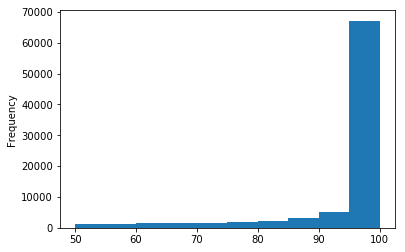

In [8]:
face_df['face_mustache_confidence'].plot(kind='hist')

In [9]:
(face_df['face_mustache_confidence'] < 75).sum() / len(face_df['face_mustache_confidence'])

0.082910321489001695

In [10]:
(face_df['eyeglasses_confidence'] < 75).sum() / len(face_df['eyeglasses_confidence'])

0.074173831969335954

In [11]:
(face_df['face_beard_confidence'] < 75).sum() / len(face_df['face_beard_confidence'])

0.09475465313028765

In [12]:
boolean_columns = ['face_beard', 'face_mustache', 'face_smile', 'eyeglasses']

In [13]:
image_face_frame[boolean_columns] =  image_face_frame[boolean_columns].astype(int)

In [14]:
image_face_frame[boolean_columns].head()

,face_beard,face_mustache,face_smile,eyeglasses
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [15]:
survey_user_with_perma_df = survey_df[['insta_user_id', 'P']]
survey_user_with_perma_df = survey_user_with_perma_df.rename(columns={'insta_user_id': 'user_id'})
survey_user_with_perma_df['user_id'] = survey_user_with_perma_df['user_id'].astype(int)
survey_user_with_perma_df.head()

,user_id,P
0,619868570,4
1,187920333,9
2,33420910,8
3,2143580844,6
4,263042348,6


In [16]:
len(survey_user_with_perma_df['user_id'].unique())

160

In [17]:
face_df_boolean = image_face_frame.groupby('user_id')[boolean_columns].mean().reset_index()
face_df_boolean['user_id'] = face_df_boolean['user_id'].astype(int)
face_df_boolean.head()

,user_id,face_beard,face_mustache,face_smile,eyeglasses
0,1619510,0.166667,0.155556,0.788889,0.666667
1,2829661,1.000000,1.000000,0.000000,0.000000
2,3069744,0.714286,0.142857,0.714286,0.285714
3,3988856,0.192308,0.230769,0.653846,0.153846
4,6734387,0.200000,0.171429,0.742857,0.457143


In [18]:
len(face_df_boolean['user_id'].unique())

123

In [19]:
face_df_boolean_with_p = pd.merge(face_df_boolean, survey_user_with_perma_df, how='left', on='user_id')
face_df_boolean_with_p.head()

,user_id,face_beard,face_mustache,face_smile,eyeglasses,P
0,1619510,0.166667,0.155556,0.788889,0.666667,3
1,2829661,1.000000,1.000000,0.000000,0.000000,8
2,3069744,0.714286,0.142857,0.714286,0.285714,5
3,3988856,0.192308,0.230769,0.653846,0.153846,10
4,6734387,0.200000,0.171429,0.742857,0.457143,6


In [20]:
face_df_boolean_with_p.corr()

,user_id,face_beard,face_mustache,face_smile,eyeglasses,P
user_id,1.000000,0.051900,0.028617,0.026484,0.210351,0.033954
face_beard,0.051900,1.000000,0.886453,-0.112683,0.405870,0.051272
face_mustache,0.028617,0.886453,1.000000,-0.096967,0.377825,0.077155
face_smile,0.026484,-0.112683,-0.096967,1.000000,0.089211,0.065684
eyeglasses,0.210351,0.405870,0.377825,0.089211,1.000000,-0.124785
P,0.033954,0.051272,0.077155,0.065684,-0.124785,1.000000


# Emotion vars

In [21]:
face_emotion_df = image_face_frame[['user_id', 'face_emo']]
face_emotion_df['user_id'] = face_emotion_df['user_id'].astype(int)
face_emotion_df.head()

/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,user_id,face_emo
0,263042348,HAPPY
1,263042348,ANGRY
2,263042348,SAD
3,263042348,ANGRY
4,263042348,HAPPY


In [22]:
df_subset = face_emotion_df[face_emotion_df['face_emo'] == 'HAPPY']
df_subset['HAPPY'] = 1
df_subset.head()

/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,user_id,face_emo,HAPPY
0,263042348,HAPPY,1
4,263042348,HAPPY,1
6,263042348,HAPPY,1
11,263042348,HAPPY,1
13,263042348,HAPPY,1


In [23]:
emotions = pd.Series(face_emotion_df['face_emo'].unique())

In [24]:
emotions

0        HAPPY
1        ANGRY
2          SAD
3         CALM
4     CONFUSED
5    DISGUSTED
6    SURPRISED
dtype: object

In [25]:
for emotion in emotions:
    face_emotion_df[emotion] = 0

/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:
face_emotion_df.head()

,user_id,face_emo,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED
0,263042348,HAPPY,0,0,0,0,0,0,0
1,263042348,ANGRY,0,0,0,0,0,0,0
2,263042348,SAD,0,0,0,0,0,0,0
3,263042348,ANGRY,0,0,0,0,0,0,0
4,263042348,HAPPY,0,0,0,0,0,0,0


In [27]:
def create_emotion_feature(emotion):
    df_subset = face_emotion_df[face_emotion_df['face_emo'] == emotion]
    df_subset[emotion] = 1
    return df_subset

In [28]:
def df_series_to_df(df_series):
    df = pd.concat([df for df in df_series], ignore_index=True)
    return(df)

In [29]:
face_emotion_features_df = df_series_to_df(emotions.apply(create_emotion_feature))
face_emotion_features_df.head()

/home/jo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,user_id,face_emo,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED
0,263042348,HAPPY,1,0,0,0,0,0,0
1,263042348,HAPPY,1,0,0,0,0,0,0
2,263042348,HAPPY,1,0,0,0,0,0,0
3,263042348,HAPPY,1,0,0,0,0,0,0
4,263042348,HAPPY,1,0,0,0,0,0,0


In [30]:
face_emotion_features_df = face_emotion_features_df.groupby('user_id').mean().reset_index()
face_df_emotion_with_p = pd.merge(face_emotion_features_df, survey_user_with_perma_df, how='left', on='user_id')

In [31]:
face_df_emotion_with_p.head()

,user_id,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED,P
0,1619510,0.307407,0.077778,0.174074,0.137037,0.192593,0.025926,0.085185,3
1,2829661,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,8
2,3069744,0.333333,0.095238,0.238095,0.142857,0.047619,0.047619,0.095238,5
3,3988856,0.307692,0.076923,0.243590,0.089744,0.089744,0.051282,0.141026,10
4,6734387,0.333333,0.114286,0.180952,0.123810,0.114286,0.076190,0.057143,6


In [32]:
face_df_emotion_with_p.corr()['P'].sort_values(ascending=False)

P            1.000000
ANGRY        0.094321
CONFUSED     0.076377
user_id      0.033954
SAD          0.019247
DISGUSTED   -0.005404
HAPPY       -0.020807
SURPRISED   -0.066868
CALM        -0.117360
Name: P, dtype: float64

# Face dataframe

In [33]:
len(face_df_emotion_with_p)

123

In [34]:
len(face_df_boolean_with_p)

123

In [35]:
face_final_df = pd.merge(face_df_boolean_with_p, face_df_emotion_with_p, on='user_id')
face_final_df.drop(['P_y'], axis=1, inplace=True)
face_final_df = face_final_df.rename(columns={'P_x': 'P'})
face_final_df = face_final_df.astype(np.float64, copy=False)
face_final_df['user_id'] = face_final_df['user_id'].astype(int)

In [36]:
face_final_df = face_final_df.fillna(0)

In [37]:
face_final_df.head()

,user_id,face_beard,face_mustache,face_smile,eyeglasses,P,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED
0,1619510,0.166667,0.155556,0.788889,0.666667,3.0,0.307407,0.077778,0.174074,0.137037,0.192593,0.025926,0.085185
1,2829661,1.000000,1.000000,0.000000,0.000000,8.0,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333
2,3069744,0.714286,0.142857,0.714286,0.285714,5.0,0.333333,0.095238,0.238095,0.142857,0.047619,0.047619,0.095238
3,3988856,0.192308,0.230769,0.653846,0.153846,10.0,0.307692,0.076923,0.243590,0.089744,0.089744,0.051282,0.141026
4,6734387,0.200000,0.171429,0.742857,0.457143,6.0,0.333333,0.114286,0.180952,0.123810,0.114286,0.076190,0.057143


In [38]:
face_final_df.to_csv('face_features.csv')

In [39]:
images_per_user_id.head()

,user_id,user_posted_photos
0,1619510,142
1,2829661,12
2,3069744,3
3,3988856,49
4,4185084,6


In [40]:
face_final_df = face_final_df.fillna(method='ffill')
face_final_df = pd.merge(face_final_df, images_per_user_id, on='user_id')

In [41]:
p_values_df = face_final_df[['user_id', 'P']]
p_values_df[0:5]

,user_id,P
0,1619510,3.0
1,2829661,8.0
2,3069744,5.0
3,3988856,10.0
4,6734387,6.0


In [42]:
del face_final_df['P']

In [43]:
# 9 = 60 * 0.15

## Checking multicollinearity

In [44]:
face_features = list(face_final_df.iloc[:,1:-1].columns)

In [45]:
from scipy.stats.stats import pearsonr
import itertools

In [46]:
face_final_df.head()

,user_id,face_beard,face_mustache,face_smile,eyeglasses,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED,user_posted_photos
0,1619510,0.166667,0.155556,0.788889,0.666667,0.307407,0.077778,0.174074,0.137037,0.192593,0.025926,0.085185,142
1,2829661,1.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,12
2,3069744,0.714286,0.142857,0.714286,0.285714,0.333333,0.095238,0.238095,0.142857,0.047619,0.047619,0.095238,3
3,3988856,0.192308,0.230769,0.653846,0.153846,0.307692,0.076923,0.243590,0.089744,0.089744,0.051282,0.141026,49
4,6734387,0.200000,0.171429,0.742857,0.457143,0.333333,0.114286,0.180952,0.123810,0.114286,0.076190,0.057143,35


In [47]:
correlations = {}

for col_a, col_b in itertools.combinations(face_features, 2):
    correlations[col_a + '__' + col_b] = pearsonr(face_final_df.loc[:, col_a], face_final_df.loc[:, col_b])

In [48]:
result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

#### Correlated features

In [49]:
len(result[result['p-value'] < 0.05].sort_values(by='p-value'))

21

In [50]:
result[result['p-value'] < 0.05].sort_values(by='p-value', ascending=True)[0:5]

,PCC,p-value
face_beard__face_mustache,0.886453,2.665193e-42
face_smile__HAPPY,0.641057,1.386309e-15
CONFUSED__SURPRISED,-0.527597,3.606289e-10
face_beard__eyeglasses,0.405870,3.201861e-06
face_mustache__eyeglasses,0.377825,1.645127e-05


#### The most uncorrelated features

In [51]:
len(result[result['p-value'] > 0.05].sort_values(by='p-value'))

34

In [52]:
result[result['p-value'] > 0.05].sort_values(by='p-value', ascending=False)[0:5]

,PCC,p-value
face_beard__SURPRISED,0.014732,0.871520
DISGUSTED__SURPRISED,-0.021020,0.817492
eyeglasses__SAD,-0.029964,0.742153
face_smile__CONFUSED,0.031153,0.732306
HAPPY__DISGUSTED,0.032892,0.717980


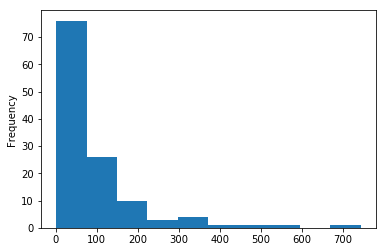

In [53]:
face_final_df['user_posted_photos'].plot(kind='hist');

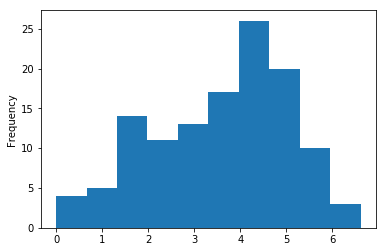

In [54]:
np.log(face_final_df['user_posted_photos']).plot(kind='hist');

### Dropping mustache and face_smile features (high Pearson correlation coefficient)

In [55]:
face_final_df.head()

,user_id,face_beard,face_mustache,face_smile,eyeglasses,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED,user_posted_photos
0,1619510,0.166667,0.155556,0.788889,0.666667,0.307407,0.077778,0.174074,0.137037,0.192593,0.025926,0.085185,142
1,2829661,1.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,12
2,3069744,0.714286,0.142857,0.714286,0.285714,0.333333,0.095238,0.238095,0.142857,0.047619,0.047619,0.095238,3
3,3988856,0.192308,0.230769,0.653846,0.153846,0.307692,0.076923,0.243590,0.089744,0.089744,0.051282,0.141026,49
4,6734387,0.200000,0.171429,0.742857,0.457143,0.333333,0.114286,0.180952,0.123810,0.114286,0.076190,0.057143,35


In [56]:
del face_final_df['face_mustache']
del face_final_df['face_smile']

In [57]:
face_features = list(face_final_df.iloc[:,1:-1].columns)

In [58]:
face_features

['face_beard',
 'eyeglasses',
 'HAPPY',
 'ANGRY',
 'SAD',
 'CALM',
 'CONFUSED',
 'DISGUSTED',
 'SURPRISED']

### No weighing

In [59]:
face_features_no_weighing_df = face_final_df.copy()
del face_features_no_weighing_df['user_posted_photos']
face_features_no_weighing_df.to_csv('face_features_with_no_weighing_df.csv')

In [60]:
face_features_no_weighing_df.head()

,user_id,face_beard,eyeglasses,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED
0,1619510,0.166667,0.666667,0.307407,0.077778,0.174074,0.137037,0.192593,0.025926,0.085185
1,2829661,1.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333
2,3069744,0.714286,0.285714,0.333333,0.095238,0.238095,0.142857,0.047619,0.047619,0.095238
3,3988856,0.192308,0.153846,0.307692,0.076923,0.243590,0.089744,0.089744,0.051282,0.141026
4,6734387,0.200000,0.457143,0.333333,0.114286,0.180952,0.123810,0.114286,0.076190,0.057143


### Weighing (No transformation)

In [61]:
face_features_with_weighing_df = pd.DataFrame()

def face_features_weighing(feature_name):
    face_features_with_weighing_df['user_id'] = face_final_df['user_id']
    face_features_with_weighing_df[feature_name] = face_final_df[feature_name] * face_final_df['user_posted_photos']
    return face_features_with_weighing_df

In [62]:
for feature in face_features:
    face_features_weighing(feature)

In [63]:
face_features_with_weighing_df.head()

,user_id,face_beard,eyeglasses,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED
0,1619510,23.666667,94.666667,43.651852,11.044444,24.718519,19.459259,27.348148,3.681481,12.096296
1,2829661,12.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,4.000000
2,3069744,2.142857,0.857143,1.000000,0.285714,0.714286,0.428571,0.142857,0.142857,0.285714
3,3988856,9.423077,7.538462,15.076923,3.769231,11.935897,4.397436,4.397436,2.512821,6.910256
4,6734387,7.000000,16.000000,11.666667,4.000000,6.333333,4.333333,4.000000,2.666667,2.000000


In [64]:
face_features_with_weighing_df.to_csv('face_features_with_weighing_df.csv')

### Weighing (Log transformation)

In [65]:
face_features_with_log_weighing_df = pd.DataFrame()

def face_features_log_weighing(feature_name):
    face_features_with_log_weighing_df['user_id'] = face_final_df['user_id']
    face_features_with_log_weighing_df[feature_name] = face_final_df[feature_name] * np.log(face_final_df['user_posted_photos'])
    return face_features_with_log_weighing_df

In [66]:
for feature in face_features:
    face_features_log_weighing(feature)

In [67]:
face_features_with_log_weighing_df.to_csv('face_features_with_log_weighing_df.csv')

In [68]:
face_features_with_log_weighing_df.head()

,user_id,face_beard,eyeglasses,HAPPY,ANGRY,SAD,CALM,CONFUSED,DISGUSTED,SURPRISED
0,1619510,0.825971,3.303885,1.523458,0.385453,0.862681,0.679132,0.954456,0.128484,0.422163
1,2829661,2.484907,0.000000,0.000000,0.828302,0.828302,0.000000,0.000000,0.000000,0.828302
2,3069744,0.784723,0.313889,0.366204,0.104630,0.261574,0.156945,0.052315,0.052315,0.104630
3,3988856,0.748427,0.598742,1.197483,0.299371,0.948008,0.349266,0.349266,0.199581,0.548846
4,6734387,0.711070,1.625302,1.185116,0.406325,0.643349,0.440186,0.406325,0.270884,0.203163


# Modeling

In [79]:
X_train = face_final_df[:90]
X_test = face_final_df[91:]

X_train.drop(['P'], axis=1, inplace=True)
X_test.drop(['P'], axis=1, inplace=True)

Y_train = face_final_df[:90]['P']
Y_test = face_final_df[91:]['P']

ValueError: labels ['P'] not contained in axis

In [ ]:
X_train.head()

In [ ]:
Y_train.head()

#### Fitting the linear model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(X_train, Y_train)

In [ ]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [ ]:
len(Y_test), len(X_test)

In [ ]:
Y_pred

In [ ]:
plt.scatter(Y_pred, Y_test)
plt.show()

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

In [ ]:
plt.scatter(X_train['HAPPY'], Y_train)
plt.xlabel("Disgusted")
plt.ylabel("PERMA score")
plt.title("Relationship between Disgusted and PERMA score")
plt.show()
# As can be seen that there is a positive correlation between RM and housing prices.

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("PERMA: $Y_i$")
plt.ylabel("Predicted PERMA: $\hat{Y}_i$")
plt.title("PERMA vs Predicted PERMA: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
r2_score(Y_test, Y_pred)

In [ ]:
#We can notice that there is some error in  the prediction as the housing prices increase.
#Lets calculate the mean squared error.
mseFull = np.mean(Y_train - lm.predict(X_train)** 2)
print(mseFull)